**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Teoría y Práctica del Agrupamiento de Datos

## Agrupamiento de datos

El agrupamiento de datos es un modelo basado en el aprendizaje no supervisado que permite encontrar un vector de clases a partir de un conjunto de datos o características. El agrupamiento busca las relaciones de los datos por cada grupo o cluster, lo cual permite diferenciar un grupo de datos con respecto a otro. Usualmente, este tipo de relaciones se establece entre los datos y un centro o centroide de un cluster o grupo, permitiendo agrupar los datos más cercanos a un centro. Considerando lo anterior, la relación entre los datos y el centro se calcula mediante una *medida de distancia*, por ejemplo, la distancia Euclidiana:

$$d_{n,c} = \vert \vert x_n - v_c \vert \vert^2$$

donde $x_n$ es un vector de datos localizado en una fila o muestra de datos $n$, $v_c$ es un centro de un cluster $c$ (*Nota*: el centro es en realidad un vector de la forma $v_c = \lbrace v_{c,1}, \ldots, v_{c,d}, \ldots, v_{c,D}\rbrace$, donde $d$ es una característica o columna de la base de datos), y $\vert \vert \cdot \vert \vert^2$ es la norma 2 para calcular la distancia Euclidiana.

Otro punto importante del agrupamiento es la separación de un cluster con respecto a otro cluster, lo cual entre más separación se genere, mayor facilidad para diferenciar que datos pertenece a un cluster con respecto a otro. Usando la distancia Euclidiana, se establece que:

$$d_{i,j} = \vert \vert v_i - v_j \vert \vert^2$$

donde $d_{i,j}$ es la distancia euclidiana entre un centro $v_i$ y un centro $v_j$.

Al asumir ambas medidas de distancia, se establecen dos conceptos fundamentales del agrupamiento de datos: **Compactación** y **Separabilidad**. La compactación ($d_{n,c}$), es una medida que establece que tan cercano o alejado esta un conjunto de datos a un centro o centroide. Por otra parte, la separabilidad ($d_{i,j}$), es una medida que establece la separación entre clusters, de tal forma que si hay una mayor distancia entre ellos, se puede diferenciar mejor los datos que pertenencen a un cluster con respecto a otro.

![](https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Clustering.png)

## Algoritmo K-Means

K-means o k-medias es un algoritmo de agrupamiento basado en un **métrica de distancia**. Por lo general, se debe especificar el número de clusters para que luego el algoritmo aleatoriamente represente los prototipos o centros de cada cluster. Luego, se asigna un conjunto de muestras al centro del cluster más cercano de acuerdo a una métrica de distancia que los separa del centro. Para cada uno de los clusters se calcula el centroide de todas sus muestras, lo cual se toman como los nuevos centros de sus respectivos clusters. La iteración continua hasta que se repite la asignación de las mismas muestras a los mismos clusters (es decir, que se logre una estabilidad del agrupamiento) o que el error de optimización sea menor al fijado por el usuario.

Pasos del algoritmo K-means:

1) Elegir un número de clusters que actúan como la cantidad que clusters que se desea llegar. El usuario puede fijar el error de optimización de la función de costo que desea obtener del agrupamiento.

2) El algoritmo genera de forma aleatoria un conjunto de centroides de acuerdo al número de clusters.

3) Para cada muestra de los datos, se añade esta muestra a un cluster que se ajuste mejor.

4) Se calcula de nuevo los centros, lo cual van a ser los nuevos centros del agrupamiento.

5) Si no se llega al error de optimización dado por el usuario, volver al paso 3.

### Leer base de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import io

Para este caso, utilizaremos una base de datos de un sonar con 60 bandas, para identificar si en un área determinada hay una mina (M) o una roca (R). Cada banda esta normalizado entre 0 y 1, el cual son los niveles de energía normalizados que permiten hacer un escaner del área de interés

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/sonar.dat"
download = requests.get(url).content
data = pd.read_table(io.StringIO(download.decode('utf-8')),sep=',',decimal = ',')
display(data.head())

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Type
0,0.02,0.037,0.043,0.021,0.095,0.099,0.154,0.16,0.311,0.211,...,0.0030,0.0060,0.016,0.0070,0.017,0.018,0.0080,0.0090,0.0030,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.0080,0.0090,0.0050,0.0090,0.019,0.014,0.0050,0.0050,0.0040,R
2,0.026,0.058,0.11,0.108,0.097,0.228,0.243,0.377,0.56,0.619,...,0.023,0.017,0.01,0.018,0.024,0.032,0.016,0.01,0.0080,R
3,0.01,0.017,0.062,0.02,0.02,0.037,0.11,0.128,0.06,0.126,...,0.012,0.0040,0.015,0.0080,0.0070,0.0050,0.0040,0.0040,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.0030,0.0050,0.01,0.011,0.0020,0.0070,0.0050,0.011,0.0090,R


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Band1    208 non-null    object
 1    Band2   208 non-null    object
 2    Band3   208 non-null    object
 3    Band4   208 non-null    object
 4    Band5   208 non-null    object
 5    Band6   208 non-null    object
 6    Band7   208 non-null    object
 7    Band8   208 non-null    object
 8    Band9   208 non-null    object
 9    Band10  208 non-null    object
 10   Band11  208 non-null    object
 11   Band12  208 non-null    object
 12   Band13  208 non-null    object
 13   Band14  208 non-null    object
 14   Band15  208 non-null    object
 15   Band16  208 non-null    object
 16   Band17  208 non-null    object
 17   Band18  208 non-null    object
 18   Band19  208 non-null    object
 19   Band20  208 non-null    object
 20   Band21  208 non-null    object
 21   Band22  208 non-null    object
 22   B

Vamos a separar los datos de la siguiente forma: los datos, $X$, serán representados desde *band1* hasta *band60*, y la columna *Type*, se llamará $Y$

In [ ]:
columnas = data.columns # Extraemos los nombres de las columnas
X = data.loc[:,:' Band60']
Y = data[' Type']

In [ ]:
X

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band51,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60
0,0.02,0.037,0.043,0.021,0.095,0.099,0.154,0.16,0.311,0.211,...,0.023,0.0030,0.0060,0.016,0.0070,0.017,0.018,0.0080,0.0090,0.0030
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.012,0.0080,0.0090,0.0050,0.0090,0.019,0.014,0.0050,0.0050,0.0040
2,0.026,0.058,0.11,0.108,0.097,0.228,0.243,0.377,0.56,0.619,...,0.0030,0.023,0.017,0.01,0.018,0.024,0.032,0.016,0.01,0.0080
3,0.01,0.017,0.062,0.02,0.02,0.037,0.11,0.128,0.06,0.126,...,0.024,0.012,0.0040,0.015,0.0080,0.0070,0.0050,0.0040,0.0040,0.012
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.016,0.0030,0.0050,0.01,0.011,0.0020,0.0070,0.0050,0.011,0.0090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.019,0.035,0.017,0.018,0.039,0.163,0.203,0.169,0.233,0.268,...,0.02,0.012,0.01,0.02,0.0030,0.01,0.0060,0.012,0.019,0.016
204,0.032,0.01,0.03,0.056,0.076,0.096,0.099,0.102,0.103,0.215,...,0.0050,0.0060,0.0090,0.014,0.0060,0.0060,0.0030,0.0030,0.0060,0.0070
205,0.052,0.044,0.018,0.029,0.035,0.117,0.126,0.118,0.126,0.253,...,0.016,0.016,0.0030,0.0050,0.0060,0.0090,0.014,0.014,0.0080,0.0030
206,0.03,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.194,0.235,...,0.0040,0.0090,0.0050,0.013,0.0040,0.0040,0.0030,0.0080,0.0040,0.0050


Usaremos solo $X$ para encontrar un vector de clases con el algoritmo K-Means. Primero, vamos a convertir el tipo de variable *object*  por *float*.

In [ ]:
X = X.astype('float')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Band1    208 non-null    float64
 1    Band2   208 non-null    float64
 2    Band3   208 non-null    float64
 3    Band4   208 non-null    float64
 4    Band5   208 non-null    float64
 5    Band6   208 non-null    float64
 6    Band7   208 non-null    float64
 7    Band8   208 non-null    float64
 8    Band9   208 non-null    float64
 9    Band10  208 non-null    float64
 10   Band11  208 non-null    float64
 11   Band12  208 non-null    float64
 12   Band13  208 non-null    float64
 13   Band14  208 non-null    float64
 14   Band15  208 non-null    float64
 15   Band16  208 non-null    float64
 16   Band17  208 non-null    float64
 17   Band18  208 non-null    float64
 18   Band19  208 non-null    float64
 19   Band20  208 non-null    float64
 20   Band21  208 non-null    float64
 21   Band22  208 non

Luego, vamos a generar un reporte estadístico para describir cada característica de los datos $X$:

In [ ]:
pd.set_option('max_columns', None)
X.describe()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,Band11,Band12,Band13,Band14,Band15,Band16,Band17,Band18,Band19,Band20,Band21,Band22,Band23,Band24,Band25,Band26,Band27,Band28,Band29,Band30,Band31,Band32,Band33,Band34,Band35,Band36,Band37,Band38,Band39,Band40,Band41,Band42,Band43,Band44,Band45,Band46,Band47,Band48,Band49,Band50,Band51,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029173,0.038428,0.043870,0.053889,0.075231,0.104572,0.121755,0.134793,0.178005,0.208260,0.236038,0.250188,0.273308,0.296582,0.320187,0.378481,0.416034,0.452308,0.504812,0.563082,0.609038,0.624255,0.646957,0.672639,0.675437,0.699856,0.702159,0.694038,0.642101,0.580928,0.504481,0.439062,0.417226,0.403264,0.392591,0.384870,0.363841,0.339678,0.325808,0.311202,0.289236,0.278274,0.246567,0.214101,0.197236,0.160601,0.122428,0.091409,0.051928,0.020433,0.016072,0.013394,0.010702,0.010913,0.009284,0.008221,0.007832,0.007933,0.007942,0.006500
std,0.022975,0.032949,0.038424,0.046494,0.055549,0.059095,0.061830,0.085111,0.118388,0.134413,0.132662,0.140031,0.140946,0.164510,0.205416,0.232654,0.263683,0.261506,0.257956,0.262642,0.257843,0.255865,0.250178,0.239117,0.244938,0.237219,0.245669,0.237186,0.240251,0.220756,0.214009,0.213263,0.206491,0.231242,0.259125,0.264113,0.239925,0.212960,0.199089,0.178675,0.171148,0.168743,0.138977,0.133279,0.151619,0.133900,0.086983,0.062409,0.035955,0.013643,0.012022,0.009652,0.007083,0.007288,0.007102,0.005726,0.005814,0.006443,0.006175,0.005039
min,0.002000,0.001000,0.002000,0.006000,0.007000,0.010000,0.003000,0.006000,0.008000,0.011000,0.029000,0.024000,0.018000,0.027000,0.003000,0.016000,0.035000,0.038000,0.049000,0.066000,0.051000,0.022000,0.056000,0.024000,0.024000,0.092000,0.048000,0.028000,0.014000,0.061000,0.048000,0.040000,0.048000,0.021000,0.022000,0.008000,0.035000,0.038000,0.037000,0.012000,0.036000,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.001000
25%,0.013000,0.016000,0.019000,0.024000,0.037750,0.067000,0.080750,0.080000,0.096750,0.111000,0.129000,0.133750,0.165750,0.175250,0.164750,0.196500,0.205750,0.242000,0.299000,0.350750,0.399750,0.407250,0.450250,0.540750,0.526000,0.544250,0.532000,0.535000,0.463500,0.411000,0.345250,0.281250,0.257500,0.218000,0.179250,0.154500,0.160000,0.174000,0.174250,0.186500,0.163250,0.158750,0.155000,0.127000,0.094000,0.068750,0.064000,0.045000,0.026000,0.011750,0.008000,0.007000,0.005000,0.005000,0.004000,0.004000,0.004000,0.004000,0.004000,0.003000
50%,0.023000,0.031000,0.034000,0.044000,0.062500,0.092000,0.107000,0.112000,0.152000,0.182500,0.224500,0.249000,0.264000,0.281000,0.281500,0.305000,0.308500,0.368500,0.435000,0.542500,0.618000,0.665000,0.700000,0.698500,0.721000,0.754000,0.745500,0.732000,0.680500,0.607000,0.490500,0.429500,0.391000,0.351000,0.313000,0.321500,0.306500,0.312500,0.283500,0.278000,0.259000,0.245000,0.222500,0.178000,0.148000,0.121500,0.102000,0.078000,0.044500,0.018000,0.014000,0.011500,0.010000,0.009000,0.008000,0.007000,0.006000,0.006000,0.006000,0.005000
75%,0.035250,0.048000,0.058250,0.064250,0.100750,0.134000,0.154000,0.169250,0.233500,0.268500,0.302000,0.331250,0.351250,0.385750,0.453000,0.535500,0.659500,0.679000,0.731500,0.809250,0.817000,0.832000

Observen que algunas características están normalizadas hasta 1 pero otras características tiene un valor máximo menor a 1. Para este caso, vamos a realizar dos experimentos: El primer experimento es agrupar los datos con $X$ y el segundo experimento es agrupar los datos con una normalización min-max, el cual llamaremos como $X_{norm}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler(feature_range = (0,1))
X_norm = MM.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = columnas[0:60])
display(X_norm.head())

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,Band11,Band12,Band13,Band14,Band15,Band16,Band17,Band18,Band19,Band20,Band21,Band22,Band23,Band24,Band25,Band26,Band27,Band28,Band29,Band30,Band31,Band32,Band33,Band34,Band35,Band36,Band37,Band38,Band39,Band40,Band41,Band42,Band43,Band44,Band45,Band46,Band47,Band48,Band49,Band50,Band51,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60
0,0.133333,0.154506,0.134868,0.035714,0.223350,0.239247,0.408108,0.339956,0.448889,0.285714,0.187234,0.196481,0.296403,0.038144,0.063190,0.214649,0.284974,0.272349,0.482650,0.443255,0.555321,0.495910,0.399364,0.544057,0.662910,0.605727,0.695378,0.802469,0.674442,0.346113,0.090414,0.246914,0.487395,0.777542,0.850716,0.849798,0.692896,0.594595,0.481560,0.285403,0.017361,0.338217,0.364812,0.548969,0.375533,0.190672,0.190217,0.401198,0.191919,0.390244,0.23,0.028571,0.153846,0.441176,0.136364,0.435897,0.500000,0.181818,0.250000,0.046512
1,0.318519,0.218884,0.269737,0.150000,0.281726,0.666667,0.575676,0.754967,0.482963,0.394286,0.656738,0.925220,0.969784,0.776289,0.745236,0.944049,1.000000,0.882536,0.791798,0.766595,0.495258,0.391616,0.360169,0.376025,0.308402,0.251101,0.293067,0.256173,0.434077,0.151225,0.360566,0.286195,0.157563,0.225636,0.111452,0.413306,0.381421,0.070686,0.154900,0.201525,0.151620,0.063492,0.181113,0.210052,0.088193,0.027435,0.096014,0.221557,0.207071,0.073171,0.12,0.100000,0.230769,0.117647,0.181818,0.487179,0.388889,0.113636,0.138889,0.069767
2,0.177778,0.244635,0.355263,0.242857,0.228426,0.586022,0.648649,0.818985,0.817778,0.868571,0.856738,1.000000,0.771223,0.520619,0.646941,0.688708,0.664249,0.745322,0.887487,0.852248,0.786091,0.666667,0.395127,0.349385,0.521516,0.164097,0.482143,0.848765,0.598377,0.841321,0.874728,0.520763,0.144958,0.264831,0.410020,0.298387,0.630601,0.663202,0.527924,0.501089,0.496528,0.308913,0.275550,0.286082,0.300142,0.024691,0.244565,0.221557,0.065657,0.134146,0.03,0.314286,0.435897,0.264706,0.386364,0.615385,0.888889,0.363636,0.277778,0.162791
3,0.059259,0.068670,0.197368,0.033333,0.032995,0.072581,0.289189,0.269316,0.077037,0.164286,0.083688,0.256598,0.000000,0.205155,0.170512,0.200407,0.035233,0.197505,0.375394,0.354390,0.234984,0.354806,0.529661,0.472336,0.297131,0.485683,0.502101,0.230453,0.197769,0.314164,0.629630,0.778900,0.592437,0.348517,0.381391,0.295363,0.553005,0.876299,1.000000,0.985839,0.666667,0.604396,0.415265,0.412371,0.611664,0.500686,0.481884,0.473054,0.343434,0.353659,0.24,0.157143,0.102564,0.411765,0.159091,0.179487,0.138889,0.090909,0.111111,0.255814
4,0.548148,0.283262,0.151316,0.078571,0.131980,0.147849,0.318919,0.532009,0.515556,0.621429,0.547518,0.543988,0.587050,0.398969,0.451354,0.525941,0.721244,0.603950,0.161935,0.426124,0.383562,0.416155,0.547669,0.528689,0.299180,0.149780,0.684874,1.000000,0.722110,0.437700,0.503268,0.567901,0.252101,0.081568,0.176892,0.413306,0.464481,0.295218,0.259220,0.251634,0.187500,0.290598,0.239327,0.108247,0.098151,0.072702,0.065217,0.023952,0.116162,0.060976,0.16,0.028571,0.128205,0.264706,0.227273,0.051282,0.194444,0.113636,0.305556,0.186047


In [ ]:
X_norm.describe()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,Band11,Band12,Band13,Band14,Band15,Band16,Band17,Band18,Band19,Band20,Band21,Band22,Band23,Band24,Band25,Band26,Band27,Band28,Band29,Band30,Band31,Band32,Band33,Band34,Band35,Band36,Band37,Band38,Band39,Band40,Band41,Band42,Band43,Band44,Band45,Band46,Band47,Band48,Band49,Band50,Band51,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.201282,0.160635,0.137731,0.114022,0.173175,0.254226,0.320959,0.284312,0.251859,0.281799,0.293672,0.331653,0.367349,0.277919,0.318142,0.368750,0.394854,0.430673,0.479298,0.532207,0.588028,0.615802,0.626013,0.664590,0.667456,0.669445,0.687141,0.685225,0.637019,0.553704,0.497256,0.447882,0.387842,0.404941,0.378928,0.379909,0.359389,0.313594,0.304328,0.325928,0.293097,0.332447,0.318975,0.275903,0.280563,0.220303,0.221790,0.273679,0.262262,0.249179,0.160721,0.177060,0.274408,0.291572,0.188265,0.210799,0.217548,0.180288,0.220620,0.127907
std,0.170186,0.141414,0.126396,0.110700,0.140989,0.158859,0.167108,0.187884,0.175389,0.192019,0.188174,0.205324,0.202800,0.169598,0.206034,0.236678,0.273247,0.271835,0.271248,0.281201,0.271699,0.261620,0.265019,0.244997,0.250962,0.261255,0.258055,0.244018,0.243662,0.235097,0.233125,0.239353,0.216903,0.244959,0.264954,0.266243,0.262214,0.221372,0.209788,0.194635,0.198088,0.206036,0.179789,0.171752,0.215675,0.183676,0.157577,0.186852,0.181593,0.166382,0.120221,0.137890,0.181620,0.214350,0.161405,0.146809,0.161500,0.146432,0.171531,0.117186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.081481,0.064378,0.055921,0.042857,0.078046,0.153226,0.210135,0.163355,0.131481,0.142857,0.141844,0.160924,0.212590,0.152835,0.162237,0.183622,0.176943,0.212058,0.262881,0.304872,0.367492,0.393916,0.417638,0.529457,0.514344,0.498073,0.508403,0.521605,0.455882,0.372737,0.323802,0.270763,0.220063,0.208686,0.160787,0.147681,0.136612,0.141372,0.144626,0.190087,0.147280,0.186508,0.200517,0.163660,0.133713,0.094307,0.115942,0.134731,0.131313,0.143293,0.080000,0.085714,0.128205,0.117647,0.068182,0.102564,0.111111,0.090909,0.111111,0.046512
50%,0.155556,0.128755,0.105263,0.090476,0.140863,0.220430,0.281081,0.233996,0.213333,0.245000,0.277305,0.329912,0.353957,0.261856,0.279338,0.293998,0.283420,0.343555,0.405889,0.510171,0.597471,0.657464,0.682203,0.691086,0.714139,0.729075,0.732668,0.724280,0.675963,0.581470,0.482026,0.437149,0.360294,0.349576,0.297546,0.316028,0.296721,0.285343,0.259747,0.289760,0.258102,0.291819,0.287840,0.229381,0.210526,0.166667,0.184783,0.233533,0.224747,0.219512,0.140000,0.150000,0.256410,0.235294,0.159091,0.179487,0.166667,0.136364,0.166667,0.093023
75%,0.246296,0.201717,0.185033,0.138690,0.237944,0.333333,0.408108,0.360375,0.334074,0.367857,0.387234,0.450513,0.479496,0.369845,0.451354,0.528484,0.647150,0.666320,0.717666,0.795771,0.807165,0.828221

Una vez realizado este preprocesamiento de datos, vamos aplicar el algoritmo K-Means para agrupar los datos:

### Aplicando el algoritmo K-Means

In [ ]:
from sklearn.cluster import KMeans # Algoritmo KMeans

In [ ]:
Numero_Clusters = 2
error = 1e-4
max_iteraciones = 5000

Modelo_Kmeans_X = KMeans(n_clusters = Numero_Clusters, max_iter = max_iteraciones, 
                       tol = error,random_state = 17)
Modelo_Kmeans_Xnorm = KMeans(n_clusters = Numero_Clusters, max_iter = max_iteraciones, 
                       tol = error,random_state = 17)
Modelo_Kmeans_X.fit(X) # Experimento 1: Agrupar con los datos originales
Modelo_Kmeans_Xnorm.fit(X_norm) # Experimento 2: Agrupar con los datos normalizados

KMeans(max_iter=5000, n_clusters=2, random_state=17)

Como pueden observar, usamos los datos originales y los datos normalizados para obtener dos modelos de agrupamiento de datos. Es importante aclarar que usamos 2 clusters debido a que la variable *Type* tiene dos clases, M y R, y por consiguiente, sabiamos con antelación el número apropiado de clusters (Ojo, no todas las veces se puede hacer esto puesto que hay bases de datos que NO tenemos la información del número óptimo de clusters, pero eso lo veremos con otro ejemplo).

In [ ]:
pd.Categorical(Y)

[' R', ' R', ' R', ' R', ' R', ..., ' M', ' M', ' M', ' M', ' M']
Length: 208
Categories (2, object): [' M', ' R']

Considerando esta aclaración, vamos a extraer los vectores de clases de cada modelo:

In [ ]:
Clases_X = Modelo_Kmeans_X.labels_
Clases_Xnorm = Modelo_Kmeans_Xnorm.labels_

In [ ]:
Clases_X

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
Clases_Xnorm

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

También se puede extraer la matriz de centros de los 2 clusters:

In [ ]:
centros_X = Modelo_Kmeans_X.cluster_centers_
centros_Xnorm = Modelo_Kmeans_Xnorm.cluster_centers_

In [ ]:
centros_X.shape

(2, 60)

In [ ]:
centros_Xnorm.shape

(2, 60)

Este tamaño de la matriz de centros representa 2 clusters por 60 columnas o características de la base de datos.

A partir de los vectores de clases y las matrices de centros o centroides, vamos a realizar una representación visual del agrupamiento de datos:

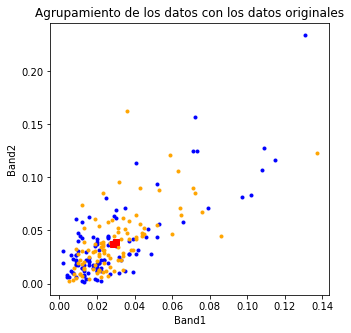

In [ ]:
# Experimento 1:

x_1 = X['Band1']
x_2 = X[' Band2']
colors = ["b", "orange"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_X == j], x_2[Clases_X == j], '.', color = colors[j])

for pt in centros_X:
    plt.plot(pt[0],pt[1],'rs')

plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento de los datos con los datos originales")
plt.show()

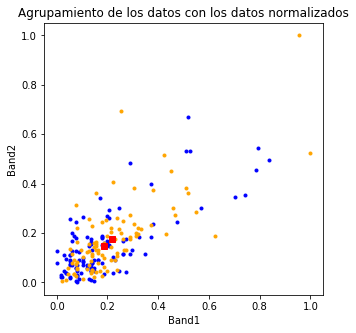

In [ ]:
# Experimento 2:

x_1 = X_norm['Band1']
x_2 = X_norm[' Band2']
colors = ["b", "orange"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_Xnorm == j], x_2[Clases_Xnorm == j], '.', color = colors[j])

for pt in centros_Xnorm:
    plt.plot(pt[0],pt[1],'rs')

plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento de los datos con los datos normalizados")
plt.show()


Comparando ambos agrupamientos, se observan algunas pequeñas diferencias en la forma como agrupo los datos. No obstante, como conocemos el vector de clases original, $Y$, podemos hacer una comparación de los resultados:

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit(Y)
Y_codificado = LE.transform(Y)
print(Y_codificado)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


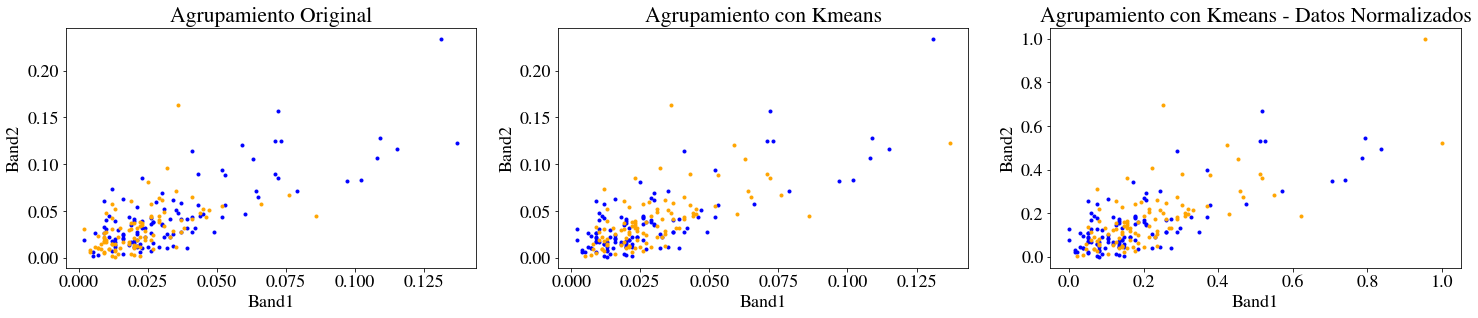

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(25,15)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(3, 3, 1)
x_1 = X['Band1']
x_2 = X[' Band2']
for j in range(Numero_Clusters):
    plt.plot(x_1[Y_codificado == j], x_2[Y_codificado == j], '.', color = colors[j])
plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento Original")

ax = fig.add_subplot(3, 3, 2)
x_1 = X['Band1']
x_2 = X[' Band2']
for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_X == j], x_2[Clases_X == j], '.', color = colors[j])
plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento con Kmeans")

ax = fig.add_subplot(3, 3, 3)
x_1_N = X_norm['Band1']
x_2_N = X_norm[' Band2']
for j in range(Numero_Clusters):
    plt.plot(x_1_N[Clases_Xnorm == j], x_2_N[Clases_Xnorm == j], '.', color = colors[j])
plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento con Kmeans - Datos Normalizados")
plt.show()

Al comparar los espacios de características de cada caso, se puede establecer que es necesario usar una o más métricas de validación para validar el desempeño de los modelos generados. Considerando el escenario que estamos trabajando y conociendo el vector de clases original, se puede aplicar **los índices de validación de clusters externas**. Veamos como se utilizan para este caso:

### Índices de Validación de Clusters Externos

**Índice Rand:** mide la similitud entre dos pares de clusters y es igual a la proporción de coincidencia entre dos particiones de datos  o clusters.

In [ ]:
from sklearn.metrics import rand_score

In [ ]:
P1 = rand_score(Clases_X, Y_codificado)
P2 = rand_score(Clases_Xnorm, Y_codificado)

**Índice Rand Ajustado:** es una mejora del índice Rand que asume una distribución de probabilidad hipergeométrica generalizada de dos particiones de datos generados por un modelo de agrupamiento. Mientras que el indice Rand selecciona de forma ordenada las particiones, este índice selecciona las particiones de forma aleatoria.

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
P3 = adjusted_rand_score(Clases_X, Y_codificado)
P4 = adjusted_rand_score(Clases_Xnorm, Y_codificado)

**Métrica V:** es la normalización de la métrica de información mutua, el cual es un promedio entre la medida de exhaustividad y homogenidad de los clusters. Esta métrica es útil para determinar si el agrupamiento de datos contiene una cantidad de información que establezca si la incertidumbre de la etiquetación de los datos es alta o baja.

In [ ]:
from sklearn.metrics.cluster import v_measure_score

In [ ]:
P5 = v_measure_score(Clases_X, Y_codificado)
P6 = v_measure_score(Clases_Xnorm, Y_codificado)

**Índice de Fowlkes-Mallows** es una métrica que evalua la similitud entre dos clusters, a partir del cálculo de la raíz cuadrada del producto entre la tasa de verdaderos positivos (vector de clases original) y la tasa de positivos predichos por el modelo de agrupamiento. En otras palabras, este índice permite establecer la sensibilidad y la presición del modelo de agrupamiento a partir de un vector de clases conocida.

In [ ]:
from sklearn.metrics.cluster import fowlkes_mallows_score

In [ ]:
P7 = fowlkes_mallows_score(Clases_X, Y_codificado)
P8 = fowlkes_mallows_score(Clases_Xnorm, Y_codificado)

**Métrica de la homogenidad:** mide la similitud de cada muestra de datos en un cluster o grupo, usando la métrica de entropía de Shannon para calcular la cantidad de información que aporta los datos a un cluster.

In [ ]:
from sklearn.metrics import homogeneity_score

In [ ]:
P9 = homogeneity_score(Clases_X, Y_codificado)
P10 = homogeneity_score(Clases_Xnorm, Y_codificado)

**Métrica de la información mutua normalizada:** es una medida de la similitud entre dos clusters de los mismos datos, lo cual se mide mediante una medida de entropía.

In [ ]:
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
P11 = normalized_mutual_info_score(Clases_X, Y_codificado)
P12 = normalized_mutual_info_score(Clases_Xnorm, Y_codificado)

In [ ]:
Metricas = ['Rand', 'Rand Adjusted', 'V_measure', 'FM', 'Homogeneity', 'Mutual_Info']
Valores = np.array([[P1,P3,P5,P7,P9,P11],[P2,P4,P6,P8,P10,P12]])
Indices = ['Datos Originales', 'Datos Normalizados']
Indices_Externos = pd.DataFrame(Valores, columns = Metricas, index = Indices)
display(Indices_Externos)

,Rand,Rand Adjusted,V_measure,FM,Homogeneity,Mutual_Info
Datos Originales,0.503205,0.006410,0.008790,0.502766,0.008786,0.008790
Datos Normalizados,0.505435,0.010869,0.012155,0.504998,0.012149,0.012155


En esta tabla, la métrica rand y rand ajustado con los datos normalizados tienen un valor mayor con respecto a los datos originales, puesto que entre más cercano a 1, el agrupamiento es cercano al agrupamiento original de los datos. Desafortunadamente, estos valores son bajos, lo cual, se requiere del uso de otros algoritmo de agrupamiento que genere mejores resultados. Los resultados de la métrica FM deben ser cercanos a 1, pero estos resultados muestran un resultado regular. La homogenidad, la medida V, la información mutua debe ser cercanos 1 pero al observar que son valores bajos, el agrupamiento de datos es diferente al agrupamiento original de los datos. 

### Integrando PCA con el algoritmo K-Means

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(iterated_power='auto', n_components = 60, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)
Variables_Principales = pca.fit_transform(X_norm) 

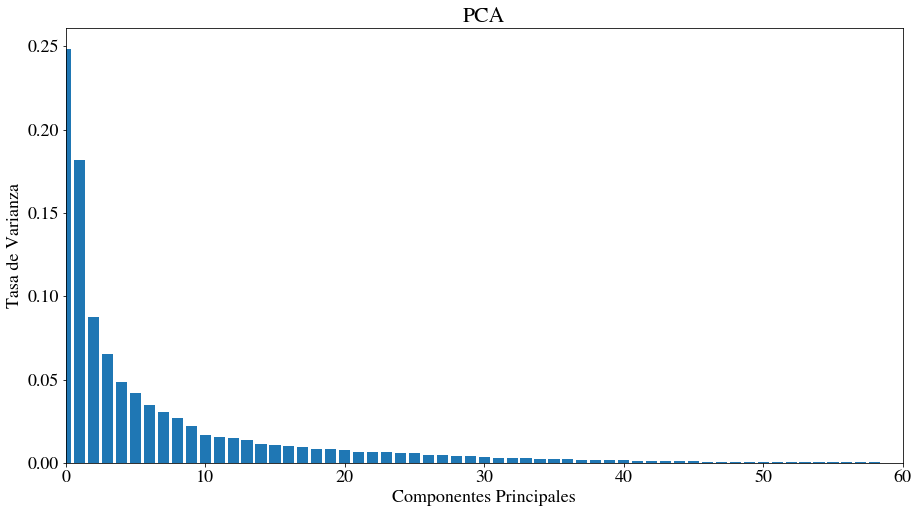

In [ ]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Varianza)), Varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()

In [ ]:
Importancia_Componentes = pd.DataFrame(data = Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes.loc[:,0:29].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:39].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 50 componentes: ", format(100*Importancia_Componentes.loc[:,0:49].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 10 componentes:  [78.74388373]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [90.64840137]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [96.27064937]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [98.72333979]
Porcentaje de Varianza detectada para las primeras 50 componentes:  [99.6703558]


In [ ]:
Componentes_Seleccionadas = 40
Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])
Nuevas_Componentes = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

X_norm_PCA = Nuevas_Componentes.fit_transform(X_norm) 

print('Tamaño de los datos originales con MinMax: ', X_norm.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', X_norm_PCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (208, 60)
Tamaño de los datos reducidos:  (208, 41)
Porcentaje de la varianza explicada con las componentes seleccionadas: 98.72%


In [ ]:
Datos_PCA_Reconstruidos = Nuevas_Componentes.inverse_transform(X_norm_PCA)
RMSE = np.sqrt(np.sum((Datos_PCA_Reconstruidos - X_norm.values)**2)/(X_norm.shape[0]))
print("RMSE = ", RMSE)

RMSE =  0.17084257531641764


In [ ]:
Numero_Clusters = 2
error = 1e-4
max_iteraciones = 5000

Modelo_Kmeans_Xnorm_PCA = KMeans(n_clusters = Numero_Clusters, max_iter = max_iteraciones, 
                       tol = error,random_state = 17)
Modelo_Kmeans_Xnorm_PCA.fit(X_norm_PCA) # Usamos los datos reducidos por PCA

KMeans(max_iter=5000, n_clusters=2, random_state=17)

In [ ]:
Clases_Xnorm_PCA = Modelo_Kmeans_Xnorm_PCA.labels_
centros_Xnorm_PCA = Modelo_Kmeans_Xnorm_PCA.cluster_centers_

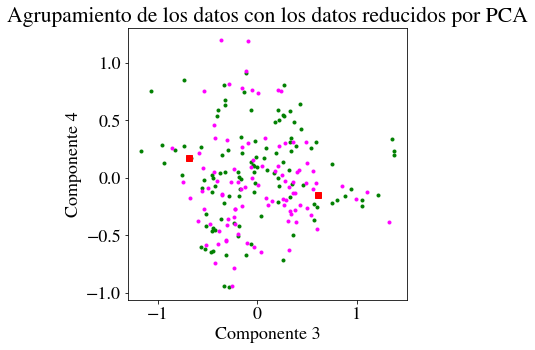

In [ ]:
x_1 = X_norm_PCA[:,2]
x_2 = X_norm_PCA[:,3]
colors = ["green", "magenta"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_Xnorm_PCA == j], x_2[Clases_Xnorm_PCA == j], '.', color = colors[j])

for pt in centros_Xnorm_PCA:
    plt.plot(pt[0],pt[1],'rs')

plt.xlabel("Componente 3")
plt.ylabel("Componente 4")
plt.title("Agrupamiento de los datos con los datos reducidos por PCA")
plt.show()

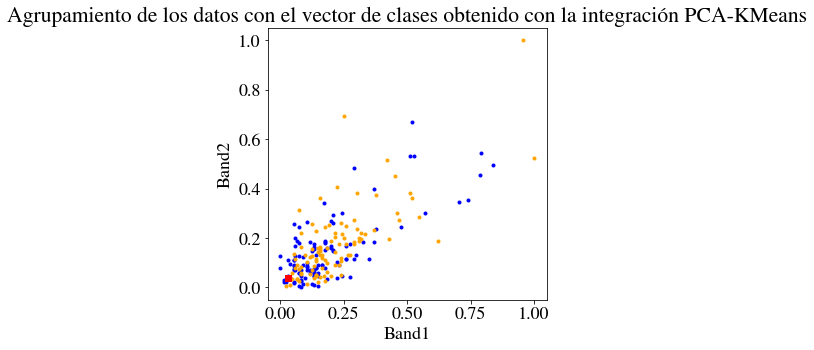

In [ ]:
x_1 = X_norm['Band1']
x_2 = X_norm[' Band2']
colors = ["blue", "orange"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_Xnorm_PCA == j], x_2[Clases_Xnorm_PCA == j], '.', color = colors[j])

for pt in centros_X:
    plt.plot(pt[0],pt[1],'rs')

plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento de los datos con el vector de clases obtenido con la integración PCA-KMeans")
plt.show()

In [ ]:
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
C1 = rand_score(Clases_Xnorm_PCA, Y_codificado)
C2 = adjusted_rand_score(Clases_Xnorm_PCA, Y_codificado)
C3 = v_measure_score(Clases_Xnorm_PCA, Y_codificado)
C4 = fowlkes_mallows_score(Clases_Xnorm_PCA, Y_codificado)
C5 = homogeneity_score(Clases_Xnorm_PCA, Y_codificado)
C6 = normalized_mutual_info_score(Clases_Xnorm_PCA, Y_codificado)

In [ ]:
Valores_Actualizados = np.array([[P1,P3,P5,P7,P9,P11],[P2,P4,P6,P8,P10,P12],[C1,C2,C3,C4,C5,C6]])
Indices = ['Datos Originales', 'Datos Normalizados', 'Datos Reducidos PCA']
Indices_Externos_Actualizados = pd.DataFrame(Valores_Actualizados, columns = Metricas, index = Indices)
display(Indices_Externos_Actualizados)

,Rand,Rand Adjusted,V_measure,FM,Homogeneity,Mutual_Info
Datos Originales,0.503205,0.006410,0.008790,0.502766,0.008786,0.008790
Datos Normalizados,0.505435,0.010869,0.012155,0.504998,0.012149,0.012155
Datos Reducidos PCA,0.505435,0.010869,0.012155,0.504998,0.012149,0.012155


### Integrando un método de selección de características con el algoritmo K-Means

Usaremos el método de selección de características basado en el test chi2, considerando el test de tasa de falsos positivos.

In [ ]:
from sklearn.feature_selection import SelectFpr, chi2

In [ ]:
seleccionador = SelectFpr(chi2, alpha=0.05)
X_seleccionados = seleccionador.fit_transform(X_norm,Y_codificado) # Usamos la clasificación original para seleccionar las características
X_seleccionados.shape

(208, 3)

In [ ]:
Columnas = seleccionador.get_feature_names_out() # Características seleccionadas

In [ ]:
X_seleccionados = pd.DataFrame(X_seleccionados, columns = Columnas)
display(X_seleccionados)

,Band11,Band12,Band45
0,0.187234,0.196481,0.375533
1,0.656738,0.925220,0.088193
2,0.856738,1.000000,0.300142
3,0.083688,0.256598,0.611664
4,0.547518,0.543988,0.098151
...,...,...,...
203,0.400000,0.394428,0.128023
204,0.395745,0.466276,0.135135
205,0.344681,0.312317,0.129445
206,0.370213,0.376833,0.187767


In [ ]:
X_reconstruidos_Fpr = seleccionador.inverse_transform(X_seleccionados)
RMSE = np.sqrt(np.sum((X_reconstruidos_Fpr - X_norm.values)**2)/(X_norm.shape[0]))
print("RMSE = ", RMSE)

RMSE =  3.315014151923741


In [ ]:
Numero_Clusters = 2
error = 1e-4
max_iteraciones = 5000

Modelo_Kmeans_Xnorm_Fpr = KMeans(n_clusters = Numero_Clusters, max_iter = max_iteraciones, 
                       tol = error,random_state = 17)
Modelo_Kmeans_Xnorm_Fpr.fit(X_seleccionados) # Usamos los datos seleccionados por el test chi2 y el test de tasa de falsos positivos 

KMeans(max_iter=5000, n_clusters=2, random_state=17)

In [ ]:
Clases_Xnorm_Fpr = Modelo_Kmeans_Xnorm_Fpr.labels_
centros_Xnorm_Fpr = Modelo_Kmeans_Xnorm_Fpr.cluster_centers_

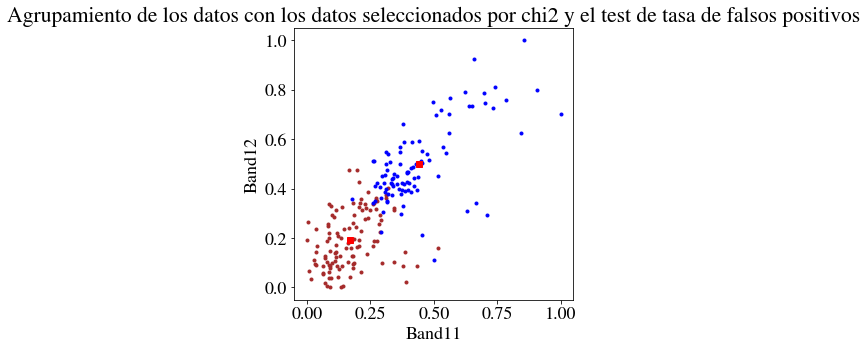

In [ ]:
x_1 = X_seleccionados[' Band11']
x_2 = X_seleccionados[' Band12']
colors = ["brown", "blue"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_Xnorm_Fpr == j], x_2[Clases_Xnorm_Fpr == j], '.', color = colors[j])

for pt in centros_Xnorm_Fpr:
    plt.plot(pt[0],pt[1],'rs')

plt.xlabel("Band11")
plt.ylabel("Band12")
plt.title("Agrupamiento de los datos con los datos seleccionados por chi2 y el test de tasa de falsos positivos")
plt.show()

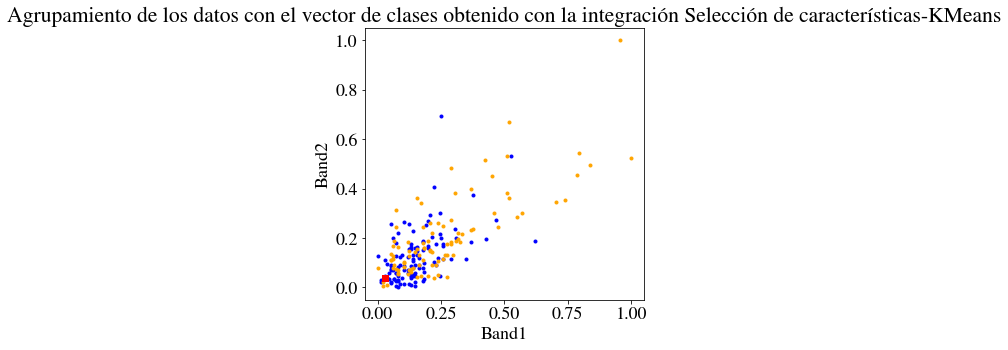

In [ ]:
x_1 = X_norm['Band1']
x_2 = X_norm[' Band2']
colors = ["blue", "orange"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_Xnorm_Fpr == j], x_2[Clases_Xnorm_Fpr == j], '.', color = colors[j])

for pt in centros_X:
    plt.plot(pt[0],pt[1],'rs')

plt.xlabel("Band1")
plt.ylabel("Band2")
plt.title("Agrupamiento de los datos con el vector de clases obtenido con la integración Selección de características-KMeans")
plt.show()

In [ ]:
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
D1 = rand_score(Clases_Xnorm_Fpr, Y_codificado)
D2 = adjusted_rand_score(Clases_Xnorm_Fpr, Y_codificado)
D3 = v_measure_score(Clases_Xnorm_Fpr, Y_codificado)
D4 = fowlkes_mallows_score(Clases_Xnorm_Fpr, Y_codificado)
D5 = homogeneity_score(Clases_Xnorm_Fpr, Y_codificado)
D6 = normalized_mutual_info_score(Clases_Xnorm_Fpr, Y_codificado)

In [ ]:
Valores_Actualizados = np.array([[P1,P3,P5,P7,P9,P11],[P2,P4,P6,P8,P10,P12],[C1,C2,C3,C4,C5,C6],[D1,D2,D3,D4,D5,D6]])
Indices = ['Datos Originales', 'Datos Normalizados', 'Datos Reducidos PCA', 'Características Seleccionadas']
Indices_Externos_Actualizados = pd.DataFrame(Valores_Actualizados, columns = Metricas, index = Indices)
display(Indices_Externos_Actualizados)

,Rand,Rand Adjusted,V_measure,FM,Homogeneity,Mutual_Info
Datos Originales,0.503205,0.006410,0.008790,0.502766,0.008786,0.008790
Datos Normalizados,0.505435,0.010869,0.012155,0.504998,0.012149,0.012155
Datos Reducidos PCA,0.505435,0.010869,0.012155,0.504998,0.012149,0.012155
Características Seleccionadas,0.583473,0.166946,0.134675,0.584343,0.134907,0.134675
